# Data Analysis Singapore Rainfall

---
## Content:
- [Datasets](#Datasets)
- [Background](#Background)
- [Problem Statement](#Problem-Statement)
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualisation](#Data-Visualisation)
- [Conclusions](#Conclusions)
- [Recommendations and Limitations](#Recommendations-and-Limitations)

---
## Datasets

1. [**Agriculture, Animal Production and Fisheries**] : Total count livestock slaughtered per year [Source](https://www.singstat.gov.sg/publications/reference/ebook/industry/agriculture-animal-production-and-fisheries)
1. [**Agriculture, Animal Production and Fisheries cont.**]: Weight of local production per year [Source](https://www.singstat.gov.sg/publications/reference/ebook/industry/agriculture-animal-production-and-fisheries)
1. [**rainfall-monthly-number-of-rain-days**] : Average number of rainy days per month [Source](https://www.singstat.gov.sg/publications/reference/ebook/society/environment)
1. [**rainfall-monthly-total**] : Average number of rainfall per month [Source](https://www.singstat.gov.sg/publications/reference/ebook/society/environment)
1. [**relative-humidity-monthly-mean**]: Average monthly humidity [Source](https://www.singstat.gov.sg/publications/reference/ebook/society/environment)
1. [**sunshine-duration-monthly-mean-daily-duration**]: Average daily sunshine hours per month [Source](https://www.singstat.gov.sg/publications/reference/ebook/society/environment)
1. [**monthly-air-temperature-and-sunshine-relative-humidity-and-rainfall**] : Average daily surface air temperature per year [Source](https://www.singstat.gov.sg/publications/reference/ebook/society/environment)

---
## Background
The agriculture industry in Singapore heavily relies on rainfall for crop irrigation and water supply. However, the unpredictable nature of rainfall patterns poses challenges for farmers iprepering preventive measuresly. The problem is to analyze rainfall in Singapore and identify the temporal trends and patterns of rainfall. By understanding these patterns, the goal is to develop a decision support system that can provide timely recommendations to farmers on when to adjust their irrigation or water supply schedules based on the expected number of rain days, helping them optimize water usage and minimize crop loss.

The effects of climate change on Singapore's local food production are apparent with increasing temperatures and more intense rainfall. These changes have led to crop damage and lower livestock yields. ["Heavy rain is not uncommon in tropical Singapore. But days of continuous downpours can wreak havoc on many of his organic vegetables, which grow outdoors on a three-hectare plot in Lim Chu Kang. Too much rain can inundate the greens or encourage the growth of pests that feed on them. Last month, short but heavy thundery showers across several days did just that to his crops."](https://www.channelnewsasia.com/singapore/climate-change-singapore-food-production-fish-eggs-1340266)

Farmers have experienced significant declines in production due to unpredicted warmer weather. [Chicken and vegetable farmer Benjamin Ang said the warmer weather is affecting his birds. “The breed that I'm growing is supposed to reach up to 4kg to 5kg, but we only hit about 3kg to 3.5kg here,” said Mr Ang, founder of Natsuki's Garden.](https://www.channelnewsasia.com/singapore/singapore-farms-damaged-crops-depleted-livestock-yields-recent-hotter-warmer-weather-higher-temperatures-3508216) These impacts underscore the importance of addressing climate change and implementing effective strategies to minimize its consequences in a cost-effective manner. 

---
## Problem Statement

Using information on elements of weather for example and not limited to rain, sunshine, temperature. In order to analysis if there is a measurable impact on the yield and production of agricultural products like livestock and vegetables. This will lead to improved water efficiency, reduced water wastage, and increased crop productivity, ultimately benefiting the agriculture industry and ensuring sustainable farming practices in Singapore.

Importing of libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

---
## Data Import and Cleaning

Reading of datasets

In [6]:
filepath = '../data/'

df_rainfall = pd.read_csv(filepath + 'rainfall-monthly-total.csv')
df_raindays = pd.read_csv(filepath + 'rainfall-monthly-number-of-rain-days.csv')
df_avg_humidity = pd.read_csv(filepath + 'relative-humidity-monthly-mean.csv')
df_avg_sunshine_duration = pd.read_csv(filepath + 'sunshine-duration-monthly-mean-daily-duration.csv')
df_monthly_weather = pd.read_csv(filepath + 'monthly-air-temperature-and-sunshine-relative-humidity-and-rainfall.csv')
df_production = pd.read_csv(filepath + 'agriculture-production.csv')
df_production_cont= pd.read_csv(filepath + 'agriculture-production-cont.csv')

Check first column (year/month) for duplicates and remove

In [7]:
def remove_duplicates(df):
    df.drop_duplicates(subset=df.columns[0], keep='first', inplace=True)

Checking of dataset

In [8]:
print(df_rainfall.shape)
df_rainfall.info()
df_rainfall.head()

(488, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


Check and remove duplicate

In [9]:
remove_duplicates(df_rainfall)

Converting montly data into yearly averages

In [10]:
yearly_rainfall = {}

for index, row in df_rainfall.iterrows():
    year = row['month'][:4]
    rainfall = row['total_rainfall']
    
    if year in yearly_rainfall:
        yearly_rainfall[year].append(rainfall)
    else:
        yearly_rainfall[year] = [rainfall]
    
average_yearly_rainfall = {}

for year, rainfall_list in yearly_rainfall.items():
    average_rainfall = sum(rainfall_list) / len(rainfall_list)
    average_yearly_rainfall[year] = average_rainfall

df_rainfall = pd.DataFrame({'year': list(average_yearly_rainfall.keys()), 'average_rainfall': list(average_yearly_rainfall.values())})
df_rainfall['year'] = df_rainfall['year'].astype(int)
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              41 non-null     int32  
 1   average_rainfall  41 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 620.0 bytes


Checking of dataset

In [11]:
print(df_raindays.shape)
df_raindays.info()
df_raindays.head()

(488, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


Check and remove duplicate

In [12]:
remove_duplicates(df_raindays)

Converting montly data into yearly averages

In [13]:
yearly_raindays = {}

for index, row in df_raindays.iterrows():
    year = row['month'][:4]
    raindays = row['no_of_rainy_days']
    
    if year in yearly_raindays:
        yearly_raindays[year].append(raindays)
    else:
        yearly_raindays[year] = [raindays]
    
average_yearly_raindays = {}

for year, raindays_list in yearly_raindays.items():
    average_raindays = round(sum(raindays_list) / len(raindays_list), 0)
    average_yearly_raindays[year] = average_raindays

df_raindays = pd.DataFrame({'year': list(average_yearly_raindays.keys()), 'average_raindays': list(average_yearly_raindays.values())})
df_raindays['year'] = df_raindays['year'].astype(int)
df_raindays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              41 non-null     int32  
 1   average_raindays  41 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 620.0 bytes


Checking of dataset

In [14]:
print(df_avg_humidity.shape)
df_avg_humidity.info()
df_avg_humidity.head()

(497, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    497 non-null    object 
 1   mean_rh  497 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


Check and remove duplicate

In [15]:
remove_duplicates(df_avg_humidity)

Converting montly data into yearly averages

In [16]:
yearly_mean_rh = {}

for index, row in df_avg_humidity.iterrows():
    year = row['month'][:4]
    mean_rh = row['mean_rh']
    
    if year in yearly_mean_rh:
        yearly_mean_rh[year].append(mean_rh)
    else:
        yearly_mean_rh[year] = [mean_rh]
    
average_yearly_mean_rh = {}

for year, mean_rh_list in yearly_mean_rh.items():
    average_mean_rh = round(sum(mean_rh_list) / len(mean_rh_list), 1)
    average_yearly_mean_rh[year] = average_mean_rh

df_avg_humidity = pd.DataFrame({'year': list(average_yearly_mean_rh.keys()), 'average_humidity': list(average_yearly_mean_rh.values())})
df_avg_humidity['year'] = df_avg_humidity['year'].astype(int)
df_avg_humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              42 non-null     int32  
 1   average_humidity  42 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 632.0 bytes


Checking of dataset

In [17]:
print(df_avg_sunshine_duration.shape)
df_avg_sunshine_duration.info()
df_avg_sunshine_duration.head()

(497, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              497 non-null    object 
 1   mean_sunshine_hrs  497 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


,month,mean_sunshine_hrs
0,1982-01,5.6
1,1982-02,7.6
2,1982-03,5.1
3,1982-04,4.7
4,1982-05,5.8


Check and remove duplicate

In [18]:
remove_duplicates(df_avg_sunshine_duration)

Converting montly data into yearly averages

In [19]:
yearly_mean_sunshine = {}

for index, row in df_avg_sunshine_duration.iterrows():
    year = row['month'][:4]
    mean_sunshine = row['mean_sunshine_hrs']
    
    if year in yearly_mean_sunshine:
        yearly_mean_sunshine[year].append(mean_sunshine)
    else:
        yearly_mean_sunshine[year] = [mean_sunshine]
    
average_yearly_mean_sunshine = {}

for year, mean_sunshine_list in yearly_mean_sunshine.items():
    average_mean_sunshine = round(sum(mean_sunshine_list) / len(mean_sunshine_list), 1)
    average_yearly_mean_sunshine[year] = average_mean_sunshine

df_avg_sunshine_duration = pd.DataFrame({'year': list(average_yearly_mean_sunshine.keys()), 'average_daily_sunshine(hrs)': list(average_yearly_mean_sunshine.values())})
df_avg_sunshine_duration['year'] = df_avg_sunshine_duration['year'].astype(int)
df_avg_sunshine_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         42 non-null     int32  
 1   average_daily_sunshine(hrs)  42 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 632.0 bytes


Checking of dataset

In [20]:
print(df_production.shape)
df_production.info()
df_production.head()

(31, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Theme: Industry  25 non-null     object 
 1   Unnamed: 1       6 non-null      float64
 2   Unnamed: 2       6 non-null      float64
 3   Unnamed: 3       6 non-null      float64
 4   Unnamed: 4       6 non-null      float64
 5   Unnamed: 5       6 non-null      float64
 6   Unnamed: 6       6 non-null      float64
 7   Unnamed: 7       6 non-null      float64
 8   Unnamed: 8       6 non-null      object 
 9   Unnamed: 9       6 non-null      object 
 10  Unnamed: 10      6 non-null      object 
 11  Unnamed: 11      6 non-null      object 
 12  Unnamed: 12      6 non-null      object 
 13  Unnamed: 13      6 non-null      object 
 14  Unnamed: 14      6 non-null      object 
 15  Unnamed: 15      6 non-null      object 
 16  Unnamed: 16      6 non-null      object 
 17  Unnamed: 

,Theme: Industry,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,"Subject: Agriculture, Animal Production and Fi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Topic: Food Supply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Table Title: Livestock Slaughtered, Annual",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data last updated: 29/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning of production (livestock) dataset

In [21]:
df_production = df_production.iloc[8:-17] # Removing the first 8 rows and the last 17 rows  
df_production = df_production.transpose() # Transposing data
df_production = df_production.rename(columns=df_production.iloc[0]).iloc[1:] # Replacing title with the first row           
df_production = df_production.rename(columns={"Data Series": "year"}) # Renaming "Data Series" column to "Year"    
df_production["year"] = df_production["year"].astype(int) # Removing excess decimal points by coverting to int
df_production = df_production.sort_values("year", ascending=True) # Sort by Year, desending
df_production = df_production.reset_index(drop=True) # Removing first index column
df_production.rename(columns={col: col.lower() + "_produced" for col in df_production.columns if col != "year"}, inplace=True)#Re-labeling of titles to keep consistancy

Checking of dataset

In [22]:
print(df_production_cont.shape)
df_production_cont.info()
df_production_cont.head()

(40, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Theme: Industry  35 non-null     object
 1   Unnamed: 1       12 non-null     object
 2   Unnamed: 2       12 non-null     object
 3   Unnamed: 3       12 non-null     object
 4   Unnamed: 4       12 non-null     object
 5   Unnamed: 5       12 non-null     object
 6   Unnamed: 6       12 non-null     object
 7   Unnamed: 7       12 non-null     object
 8   Unnamed: 8       12 non-null     object
 9   Unnamed: 9       12 non-null     object
 10  Unnamed: 10      12 non-null     object
 11  Unnamed: 11      12 non-null     object
 12  Unnamed: 12      12 non-null     object
 13  Unnamed: 13      12 non-null     object
 14  Unnamed: 14      12 non-null     object
 15  Unnamed: 15      12 non-null     object
 16  Unnamed: 16      12 non-null     object
 17  Unnamed: 17      12 non-null

,Theme: Industry,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,"Subject: Agriculture, Animal Production and Fi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Topic: Food Supply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Table Title: Local Production, Annual",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data last updated: 29/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning of production (Food Supply) dataset

    Extract only vegetable data as its a good representation of crops production amoung the dataset which was the target of this analysis

In [23]:
df_production_cont = df_production_cont.iloc[[7, 13]] # Extracting nessasry data only
df_production_cont = df_production_cont.transpose() # Transposing data
df_production_cont = df_production_cont.rename(columns=df_production_cont.iloc[0]).iloc[1:] # Replcaing title with first row
df_production_cont = df_production_cont.rename(columns={"Data Series": "year"}) # Renaming "Data Series" column to "year"
df_production_cont["year"] = df_production_cont["year"].astype(int) # Coverting to int
df_production_cont = df_production_cont.sort_values("year", ascending=True) # Sort by Year, desending
df_production_cont = df_production_cont.reset_index(drop=True) # Removing first index column
df_production_cont.rename(columns={col:"vegetables_produced(tonnes)" for col in df_production_cont.columns if col != "year"}, inplace=True)#Re-labeling of titles to keep consistancy
df_production_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   year                         47 non-null     int32 
 1   vegetables_produced(tonnes)  47 non-null     object
dtypes: int32(1), object(1)
memory usage: 692.0+ bytes


Cleaning of weather dataset

In [24]:
print(df_monthly_weather.shape)
df_monthly_weather.info()
df_monthly_weather.head()

(35, 582)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Columns: 582 entries, Theme: Society to Unnamed: 581
dtypes: object(582)
memory usage: 159.3+ KB


,Theme: Society,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 572,Unnamed: 573,Unnamed: 574,Unnamed: 575,Unnamed: 576,Unnamed: 577,Unnamed: 578,Unnamed: 579,Unnamed: 580,Unnamed: 581
0,Subject: Environment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Topic: Air Quality and Climate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Table Title: Air Temperature And Sunshine, Rel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data last updated: 04/07/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extracting only temperature data as other data is already present for example rainfall and raindays

In [25]:
df_monthly_weather = df_monthly_weather.iloc[7:-23] # Extracting nessasry data only
df_monthly_weather = df_monthly_weather.transpose() # Transposing data
df_monthly_weather = df_monthly_weather.rename(columns=df_monthly_weather.iloc[0]).iloc[1:] # Replcaing title with first row
df_monthly_weather = df_monthly_weather.rename(columns={"Data Series": "month"}) # Renaming "Data Series" column to "month"

Converting montly data into yearly averages

In [26]:
# Convert temperature data to float
df_monthly_weather['Air Temperature Means Daily Maximum (Degree Celsius)'] = df_monthly_weather['Air Temperature Means Daily Maximum (Degree Celsius)'].astype(float)
df_monthly_weather['Air Temperature Means Daily Minimum (Degree Celsius)'] = df_monthly_weather['Air Temperature Means Daily Minimum (Degree Celsius)'].astype(float)
df_monthly_weather['Air Temperature Absolute Extremes Maximum (Degree Celsius)'] = df_monthly_weather['Air Temperature Absolute Extremes Maximum (Degree Celsius)'].astype(float)
df_monthly_weather['Air Temperature Absolute Extremes Minimum (Degree Celsius)'] = df_monthly_weather['Air Temperature Absolute Extremes Minimum (Degree Celsius)'].astype(float)

# Initialize dictionary to store yearly data
yearly_data = {}

# Iterate over each row in the DataFrame
for index, row in df_monthly_weather.iterrows():
    # Extract the year from the month column
    year = row['month'][:4]
    # Get the temperature values for the current row
    max_temp = row['Air Temperature Means Daily Maximum (Degree Celsius)']
    min_temp = row['Air Temperature Means Daily Minimum (Degree Celsius)']
    max_extreme = row['Air Temperature Absolute Extremes Maximum (Degree Celsius)']
    min_extreme = row['Air Temperature Absolute Extremes Minimum (Degree Celsius)']
    
    # Check if the year already exists in the dictionary
    if year in yearly_data:
        # Append the temperature values to the existing year
        yearly_data[year]['max_temp'].append(max_temp)
        yearly_data[year]['min_temp'].append(min_temp)
        yearly_data[year]['max_extreme'].append(max_extreme)
        yearly_data[year]['min_extreme'].append(min_extreme)
    else:
        # Create a new entry for the year in the dictionary
        yearly_data[year] = {
            'max_temp': [max_temp],
            'min_temp': [min_temp],
            'max_extreme': [max_extreme],
            'min_extreme': [min_extreme]
        }
    
# Initialize dictionary to store average yearly data
average_yearly_data = {}

# Calculate the average temperature values for each year
for year, data in yearly_data.items():
    avg_max_temp = round(sum(data['max_temp']) / len(data['max_temp']), 1)
    avg_min_temp = round(sum(data['min_temp']) / len(data['min_temp']), 1)
    avg_max_extreme = round(sum(data['max_extreme']) / len(data['max_extreme']), 1)
    avg_min_extreme = round(sum(data['min_extreme']) / len(data['min_extreme']), 1)
    
    # Store the average temperature values in the dictionary
    # Re-labeling of titles to keep consistancy
    average_yearly_data[year] = {
        'mean_air_temperature_daily_maximum(°C)': avg_max_temp,
        'mean_air_temperature_daily_minimum(°C)': avg_min_temp,
        'mean_avg_air_temperature_absolute_extremes_maximum(°C)': avg_max_extreme,
        'mean_avg_air_temperature_absolute_extremes_minimum(°C)': avg_min_extreme
    }

# Create a new DataFrame with the average yearly data
df_avg_yearly_data = pd.DataFrame.from_dict(average_yearly_data, orient='index')
df_avg_yearly_data.index.name = 'year'
df_avg_yearly_data.reset_index(inplace=True)
df_monthly_weather = df_avg_yearly_data

Further cleaning for presentability of dataframe

In [27]:
df_monthly_weather["year"] = df_monthly_weather["year"].astype(int) # Coverting to int
df_monthly_weather = df_monthly_weather.sort_values("year", ascending=True) # Sort by Year, desending
df_monthly_weather = df_monthly_weather.reset_index(drop=True) # Removing first index column

Include average teamperature from the 4 data points

In [28]:
# Calculate the average
average_values = df_monthly_weather[['mean_air_temperature_daily_maximum(°C)', 'mean_air_temperature_daily_minimum(°C)',
                    'mean_avg_air_temperature_absolute_extremes_maximum(°C)', 'mean_avg_air_temperature_absolute_extremes_minimum(°C)']].mean(axis=1)

# Assign the averaged values to a new column
df_monthly_weather['average_temperature'] = average_values

Checking of dataset

In [29]:
print(df_monthly_weather.shape)
df_monthly_weather.info()
df_monthly_weather.head()

(49, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   year                                                    49 non-null     int32  
 1   mean_air_temperature_daily_maximum(°C)                  49 non-null     float64
 2   mean_air_temperature_daily_minimum(°C)                  49 non-null     float64
 3   mean_avg_air_temperature_absolute_extremes_maximum(°C)  49 non-null     float64
 4   mean_avg_air_temperature_absolute_extremes_minimum(°C)  49 non-null     float64
 5   average_temperature                                     49 non-null     float64
dtypes: float64(5), int32(1)
memory usage: 2.2 KB


,year,mean_air_temperature_daily_maximum(°C),mean_air_temperature_daily_minimum(°C),mean_avg_air_temperature_absolute_extremes_maximum(°C),mean_avg_air_temperature_absolute_extremes_minimum(°C),average_temperature
0,1975,30.4,23.3,32.3,21.4,26.850
1,1976,30.7,23.3,32.5,21.4,26.975
2,1977,30.9,23.7,32.8,22.2,27.400
3,1978,31.0,23.8,32.9,22.0,27.425
4,1979,31.0,23.9,32.9,22.0,27.450


Function to merge dataframes by year

In [30]:
def merge_dataframes(dataframes, merge_column):
    final_df = dataframes[0]
    for df in dataframes[1:]:
        final_df = pd.merge(final_df, df, on=merge_column, how='inner')
    return final_df

Merging of dataframes by year

In [31]:
final_df = merge_dataframes([df_rainfall, df_raindays, df_avg_humidity, df_avg_sunshine_duration,df_monthly_weather,
                             df_production, df_production_cont], 'year')

Dropping quails & pigs produced columns as we have substantial data representing livestock from poultry, chickens and ducks.

In [32]:
final_df = final_df.drop(columns=["quails_produced", "pigs_produced"])
final_df.head()

,year,average_rainfall,average_raindays,average_humidity,average_daily_sunshine(hrs),mean_air_temperature_daily_maximum(°C),mean_air_temperature_daily_minimum(°C),mean_avg_air_temperature_absolute_extremes_maximum(°C),mean_avg_air_temperature_absolute_extremes_minimum(°C),average_temperature,poultry_produced,chickens_produced,ducks_produced,vegetables_produced(tonnes)
0,1993,180.725000,14.0,83.7,5.9,31.3,24.6,33.0,22.4,27.825,41824,35506,6318,4800
1,1994,161.816667,13.0,83.3,5.4,31.3,24.7,32.9,22.4,27.825,43012,35956,7056,5644
2,1995,194.383333,15.0,84.5,5.1,31.3,24.7,33.2,22.9,28.025,37429,31264,6166,7337
3,1996,201.500000,14.0,83.4,5.6,31.3,24.5,33.2,22.4,27.850,42505,36312,6193,10870
4,1997,93.241667,10.0,79.6,5.7,32.4,25.3,34.0,23.2,28.725,45514,38631,6884,16281


Correct all values to integer

In [33]:
final_df['poultry_produced'] = final_df['poultry_produced'].astype(int)
final_df['chickens_produced'] = final_df['chickens_produced'].astype(int)
final_df['ducks_produced'] = final_df['ducks_produced'].astype(int)
final_df['vegetables_produced(tonnes)'] = final_df['vegetables_produced(tonnes)'].astype(int)
final_df.describe()

,year,average_rainfall,average_raindays,average_humidity,average_daily_sunshine(hrs),mean_air_temperature_daily_maximum(°C),mean_air_temperature_daily_minimum(°C),mean_avg_air_temperature_absolute_extremes_maximum(°C),mean_avg_air_temperature_absolute_extremes_minimum(°C),average_temperature,poultry_produced,chickens_produced,ducks_produced,vegetables_produced(tonnes)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2007.500000,177.740556,14.400000,81.890000,5.706667,31.576667,25.076667,33.443333,22.750000,28.211667,48804.466667,42734.733333,6039.866667,18328.233333
std,8.803408,38.548103,1.940494,2.746954,0.392106,0.358813,0.359773,0.343093,0.319212,0.301414,5780.946318,5844.175373,742.561305,5117.593297
min,1993.000000,93.241667,10.000000,75.900000,5.100000,31.100000,24.500000,32.800000,22.200000,27.825000,35485.000000,30161.000000,4290.000000,4800.000000
25%,2000.250000,159.831250,14.000000,79.600000,5.400000,31.300000,24.725000,33.200000,22.500000,27.937500,44630.500000,38154.750000,5444.000000,17216.750000
50%,2007.500000,177.933333,15.000000,83.050000,5.700000,31.550000,25.050000,33.450000,22.700000,28.212500,50184.000000,43279.500000,6125.000000,19160.000000
75%,2014.750000,200.941667,16.000000,84.075000,6.000000,31.850000,25.300000,33.675000,22.975000,28.375000,52912.750000,46825.250000,6457.250000,22289.750000
max,2022.000000,240.516667,17.000000,84.700000,6.800000,32.400000,25.900000,34.100000,23.400000,28.775000,56932.000000,51400.000000,7428.000000,24296.000000


Save cleaned and merged dataframes as csv files

In [34]:
final_df.to_csv(filepath +'final_df.csv', index=False)

---
## Data Dictionary

|Features|Type|Dataset|Description|
|---|---|---|---|
|**year**|*integer*|all data source|Year of data captured.| 
|**average_rainfall**|*float*|rainfall-monthly-total.csv|Average monthly rainfall in respective year|
|**average_raindays**|*integer*|rainfall-monthly-number-of-rain-days.csv|Average monthly days of rain in respective year| 
|**average_humidity**|*float*|relative-humidity-monthly-mean.csv|Average monthly humidity in respective year| 
|**average_daily_sunshine(hrs)**|*float*|sunshine-duration-monthly-mean-daily-duration.csv|Average hours of sunshine per day in a month for respective year| 
|**mean-air-temperature-daily-maximum(°C)**|*float*|monthly-air-temperature-and-sunshine-relative-humidity-and-rainfall.csv|Average daily maximum temperature for respective year| 
|**mean-air-temperature-daily-minimum(°C)**|*float*|monthly-air-temperature-and-sunshine-relative-humidity-and-rainfall.csv|Average daily minimum temperature for respective year| 
|**mean-avg-air-temperature-absolute-extremes-maximum(°C)**|*float*|monthly-air-temperature-and-sunshine-relative-humidity-and-rainfall.csv|Average monthly absolute extreme maximum temperature for respective year| 
|**mean-avg-air-temperature-absolute-extremes-minimum(°C)**|*float*|monthly-air-temperature-and-sunshine-relative-humidity-and-rainfall.csv|Average monthly absolute extreme minimum temperature for respective year| 
|**poultry_produced**|*integer*|agriculture-production.csv|Total number of all poultry produced, not only limiting to chickens and ducks, in respective year| 
|**chickens_produced**|*integer*|agriculture-production.csv|Total number of chickens produced in respective year| 
|**ducks_produced**|*integer*|agriculture-production.csv|Total number of ducks produced in respective year| 
|**vegetables_produced(tonnes)**|*integer*|agriculture-production-cont.csv|Total number of vegetables (tonnes) produced in respective year| 


---
## Exploratory Data Analysis

Summary Statistics

Hide year as there is no value to analyse here

In [46]:
final_df.describe().drop(columns=['year'])

,average_rainfall,average_raindays,average_humidity,average_daily_sunshine(hrs),mean_air_temperature_daily_maximum(°C),mean_air_temperature_daily_minimum(°C),mean_avg_air_temperature_absolute_extremes_maximum(°C),mean_avg_air_temperature_absolute_extremes_minimum(°C),average_temperature,poultry_produced,chickens_produced,ducks_produced,vegetables_produced(tonnes)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,177.740556,14.400000,81.890000,5.706667,31.576667,25.076667,33.443333,22.750000,28.211667,48804.466667,42734.733333,6039.866667,18328.233333
std,38.548103,1.940494,2.746954,0.392106,0.358813,0.359773,0.343093,0.319212,0.301414,5780.946318,5844.175373,742.561305,5117.593297
min,93.241667,10.000000,75.900000,5.100000,31.100000,24.500000,32.800000,22.200000,27.825000,35485.000000,30161.000000,4290.000000,4800.000000
25%,159.831250,14.000000,79.600000,5.400000,31.300000,24.725000,33.200000,22.500000,27.937500,44630.500000,38154.750000,5444.000000,17216.750000
50%,177.933333,15.000000,83.050000,5.700000,31.550000,25.050000,33.450000,22.700000,28.212500,50184.000000,43279.500000,6125.000000,19160.000000
75%,200.941667,16.000000,84.075000,6.000000,31.850000,25.300000,33.675000,22.975000,28.375000,52912.750000,46825.250000,6457.250000,22289.750000
max,240.516667,17.000000,84.700000,6.800000,32.400000,25.900000,34.100000,23.400000,28.775000,56932.000000,51400.000000,7428.000000,24296.000000


Creating box plot to visualise outliers

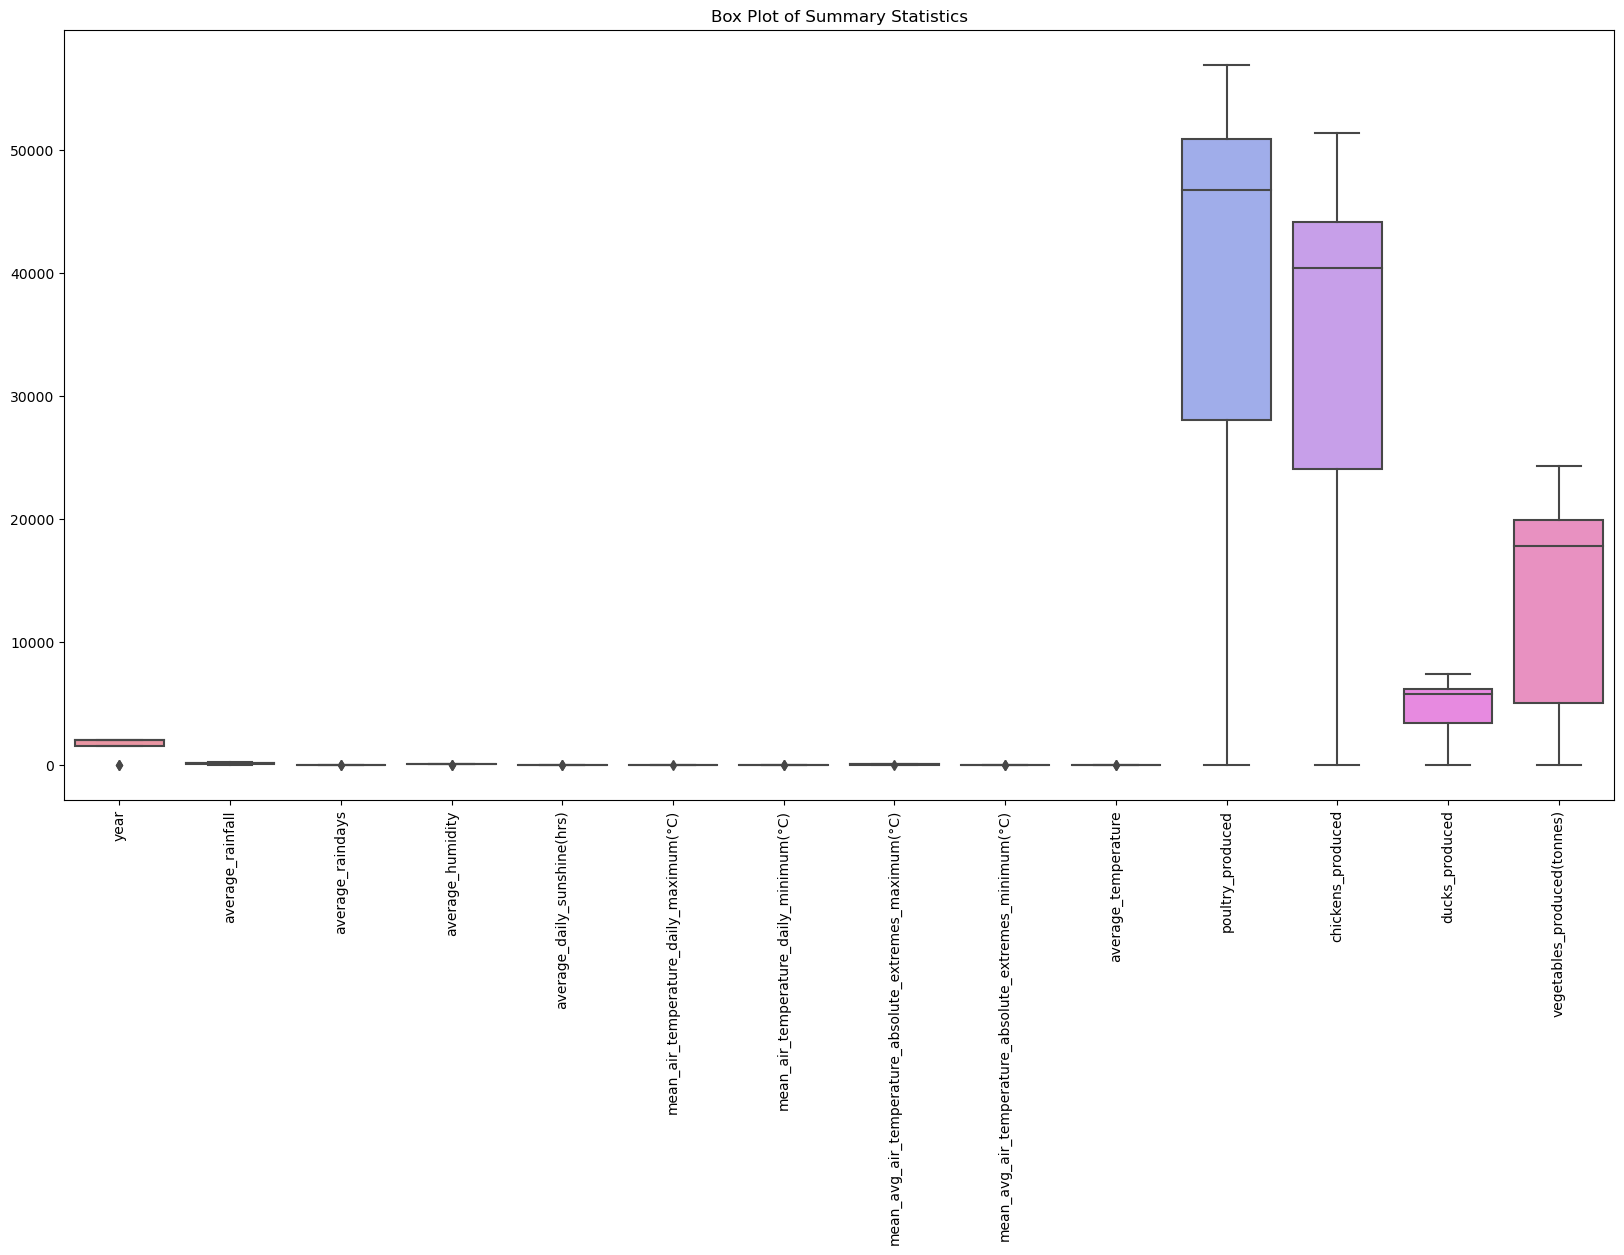

In [47]:
# Create a table using the describe() function
summary_stat_table = final_df.describe()

# Adjust width and height 
plt.figure(figsize=(20, 10)) 

# Plot a box plot using the table
sns.boxplot(data=summary_stat_table)

# Add a title to the plot
plt.title("Box Plot of Summary Statistics")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

From the box plot of summary statistics we can detect any unusual or extreme outliers in the dataset, if so, indicates the presence of data points that deviate greatly from the average. From the table we can see that no significant outliers can be seen

Application of previously created standard deviation function to each numeric column in the dataframe using a dictionary comprehension.

In [48]:
sd = {col: calculate_standard_deviation(final_df[col]) for col in final_df.select_dtypes(include='number')}
sd

{'year': 8.65544144839919,
 'average_rainfall': 37.9001894438081,
 'average_raindays': 1.9078784028338913,
 'average_humidity': 2.7007838368394705,
 'average_daily_sunshine(hrs)': 0.38551552786135884,
 'mean_air_temperature_daily_maximum(°C)': 0.35278258964347314,
 'mean_air_temperature_daily_minimum(°C)': 0.35372619668639504,
 'mean_avg_air_temperature_absolute_extremes_maximum(°C)': 0.33732608687868915,
 'mean_avg_air_temperature_absolute_extremes_minimum(°C)': 0.3138470965295043,
 'average_temperature': 0.29634814361190476,
 'poultry_produced': 5683.780635770135,
 'chickens_produced': 5745.946942169082,
 'ducks_produced': 730.0803943554588,
 'vegetables_produced(tonnes)': 5031.577199270844}

Investigation trends in the data

(Disclaimer) Since dataset has been changed from monthly to yearly to fit the outsourced dataset, some of the questions provided was edited for a better fit.

In [49]:
final_df.head()

,year,average_rainfall,average_raindays,average_humidity,average_daily_sunshine(hrs),mean_air_temperature_daily_maximum(°C),mean_air_temperature_daily_minimum(°C),mean_avg_air_temperature_absolute_extremes_maximum(°C),mean_avg_air_temperature_absolute_extremes_minimum(°C),average_temperature,poultry_produced,chickens_produced,ducks_produced,vegetables_produced(tonnes)
0,1993,180.725000,14.0,83.7,5.9,31.3,24.6,33.0,22.4,27.825,41824,35506,6318,4800
1,1994,161.816667,13.0,83.3,5.4,31.3,24.7,32.9,22.4,27.825,43012,35956,7056,5644
2,1995,194.383333,15.0,84.5,5.1,31.3,24.7,33.2,22.9,28.025,37429,31264,6166,7337
3,1996,201.500000,14.0,83.4,5.6,31.3,24.5,33.2,22.4,27.850,42505,36312,6193,10870
4,1997,93.241667,10.0,79.6,5.7,32.4,25.3,34.0,23.2,28.725,45514,38631,6884,16281


Which year have the highest and lowest total rainfall 1993, 2000, 2010 or 2020?

In [50]:
# Filter data for the specified years
years_of_interest = [1990, 2000, 2010, 2020]
filtered_data = final_df[final_df['year'].isin(years_of_interest)]

# Calculate the rainfall for each year
rainfall = filtered_data.groupby('year')['average_rainfall'].sum()

# Find the year with the highest and lowest rainfall
highest_rainfall_year = rainfall.idxmax()
lowest_rainfall_year = rainfall.idxmin()

print("Year with the highest rainfall:", highest_rainfall_year)
print("Year with the lowest rainfall:", lowest_rainfall_year)

Year with the highest rainfall: 2000
Year with the lowest rainfall: 2020


Which year have the highest and lowest total rainfall in the date range of analysis?

In [51]:
# Calculate the rainfall for each year
rainfall_all_years = final_df.groupby('year')['average_rainfall'].sum()

# Find the year with the highest and lowest rainfall
highest_rainfall_year_all = rainfall_all_years.idxmax()
lowest_rainfall_year_all = rainfall_all_years.idxmin()

print("Year with the highest rainfall in the date range:", highest_rainfall_year_all)
print("Year with the lowest rainfall in the date range:", lowest_rainfall_year_all)

Year with the highest rainfall in the date range: 2007
Year with the lowest rainfall in the date range: 1997


Which year have the highest and lowest number of rainy days in 1993, 2000, 2010 or 2020?

In [52]:
# Calculate the number of rainy days for each year
rainy_days = filtered_data.groupby('year')['average_raindays'].sum()

# Find the year with the highest and lowest number of rainy days
highest_rainy_days_year = rainy_days.idxmax()
lowest_rainy_days_year = rainy_days.idxmin()

print("Year with the highest number of rainy days:", highest_rainy_days_year)
print("Year with the lowest number of rainy days:", lowest_rainy_days_year)

Year with the highest number of rainy days: 2000
Year with the lowest number of rainy days: 2010


Which year have the highest and lowest number of rainy days in the date range of analysis?

In [53]:
# Calculate the number of rainy days for each year
rainy_days_all_years = final_df.groupby('year')['average_raindays'].sum()

# Find the year with the highest and lowest rainy days
highest_rainy_days_year_all = rainy_days_all_years.idxmax()
lowest_rainy_days_year_all = rainy_days_all_years.idxmin()

print("Year with the highest number of rainy days in the date range:", highest_rainy_days_year_all)
print("Year with the lowest number of rainy days in the date range:", lowest_rainy_days_year_all)

Year with the highest number of rainy days in the date range: 2013
Year with the lowest number of rainy days in the date range: 1997


Are there any outliers in the dataset?

In [54]:
# Calculate the z-scores for each column in the dataset
z_scores = (final_df - final_df.mean()) / final_df.std()

# Find the outliers for each column
outliers = final_df[z_scores > 3]

# Drop rows where all columns are null
outliers = outliers.dropna(how='all')

if len(outliers) > 0:
    print("There are outlier in the dataset.")
    print(outliers)
else:
    print("There are no outlier significant in the dataset.")

There are no outlier significant in the dataset.


Creating function to find correlations

In [55]:
def calculate_correlation(dataset):
    correlation = final_df.drop('year', axis=1).corr()[dataset].drop(dataset)
    print(f"Correlation coefficient between {dataset} and other variables:\n{correlation}")

Is there correlation between average rainfall and other variables in dataset?

We can observe that humidity and rain days have the highest correlation of 0.66 and 0.60 respectively as comparied to the next highest.

In [56]:
calculate_correlation('average_rainfall')

Correlation coefficient between average_rainfall and other variables:
average_raindays                                          0.664301
average_humidity                                          0.600332
average_daily_sunshine(hrs)                              -0.554712
mean_air_temperature_daily_maximum(°C)                   -0.584499
mean_air_temperature_daily_minimum(°C)                   -0.553554
mean_avg_air_temperature_absolute_extremes_maximum(°C)   -0.352787
mean_avg_air_temperature_absolute_extremes_minimum(°C)   -0.330427
average_temperature                                      -0.527012
poultry_produced                                         -0.153606
chickens_produced                                        -0.157932
ducks_produced                                            0.068137
vegetables_produced(tonnes)                              -0.147593
Name: average_rainfall, dtype: float64


Is there correlation between poultry production and other weather variables in dataset?

We can observe that other than chicken produced, which is expected, vegetables produced and mean air temperature daily minimum(°C) have the highest correlation of 0.71 and 0.48 respectively.

In [57]:
calculate_correlation('poultry_produced')

Correlation coefficient between poultry_produced and other variables:
average_rainfall                                         -0.153606
average_raindays                                          0.056367
average_humidity                                         -0.411462
average_daily_sunshine(hrs)                               0.388531
mean_air_temperature_daily_maximum(°C)                    0.154580
mean_air_temperature_daily_minimum(°C)                    0.484624
mean_avg_air_temperature_absolute_extremes_maximum(°C)    0.183570
mean_avg_air_temperature_absolute_extremes_minimum(°C)    0.100760
average_temperature                                       0.269534
chickens_produced                                         0.992380
ducks_produced                                           -0.058877
vegetables_produced(tonnes)                               0.712546
Name: poultry_produced, dtype: float64


Is there correlation between vegetables produced and other variables in dataset?

We can observe that other than chicken produced, which is expected, poultry and especially chicken produced and mean air temperature daily minimum(°C) have the highest correlation of 0.71 , 0.75 and 0.63 respectively.

In [58]:
calculate_correlation('vegetables_produced(tonnes)')

Correlation coefficient between vegetables_produced(tonnes) and other variables:
average_rainfall                                         -0.147593
average_raindays                                          0.104119
average_humidity                                         -0.525183
average_daily_sunshine(hrs)                               0.336786
mean_air_temperature_daily_maximum(°C)                    0.245049
mean_air_temperature_daily_minimum(°C)                    0.630480
mean_avg_air_temperature_absolute_extremes_maximum(°C)    0.374754
mean_avg_air_temperature_absolute_extremes_minimum(°C)    0.251992
average_temperature                                       0.434428
poultry_produced                                          0.712546
chickens_produced                                         0.753984
ducks_produced                                           -0.423077
Name: vegetables_produced(tonnes), dtype: float64


Through this EDA we are able to draw insights on factors that may have been overlooked to analysis impact on the yield and production of agricultural.

---
## Data Visualisation


View dataset

In [59]:
final_df.head()

,year,average_rainfall,average_raindays,average_humidity,average_daily_sunshine(hrs),mean_air_temperature_daily_maximum(°C),mean_air_temperature_daily_minimum(°C),mean_avg_air_temperature_absolute_extremes_maximum(°C),mean_avg_air_temperature_absolute_extremes_minimum(°C),average_temperature,poultry_produced,chickens_produced,ducks_produced,vegetables_produced(tonnes)
0,1993,180.725000,14.0,83.7,5.9,31.3,24.6,33.0,22.4,27.825,41824,35506,6318,4800
1,1994,161.816667,13.0,83.3,5.4,31.3,24.7,32.9,22.4,27.825,43012,35956,7056,5644
2,1995,194.383333,15.0,84.5,5.1,31.3,24.7,33.2,22.9,28.025,37429,31264,6166,7337
3,1996,201.500000,14.0,83.4,5.6,31.3,24.5,33.2,22.4,27.850,42505,36312,6193,10870
4,1997,93.241667,10.0,79.6,5.7,32.4,25.3,34.0,23.2,28.725,45514,38631,6884,16281


Correlation heatmap of dataset

Compute the correlation matrix

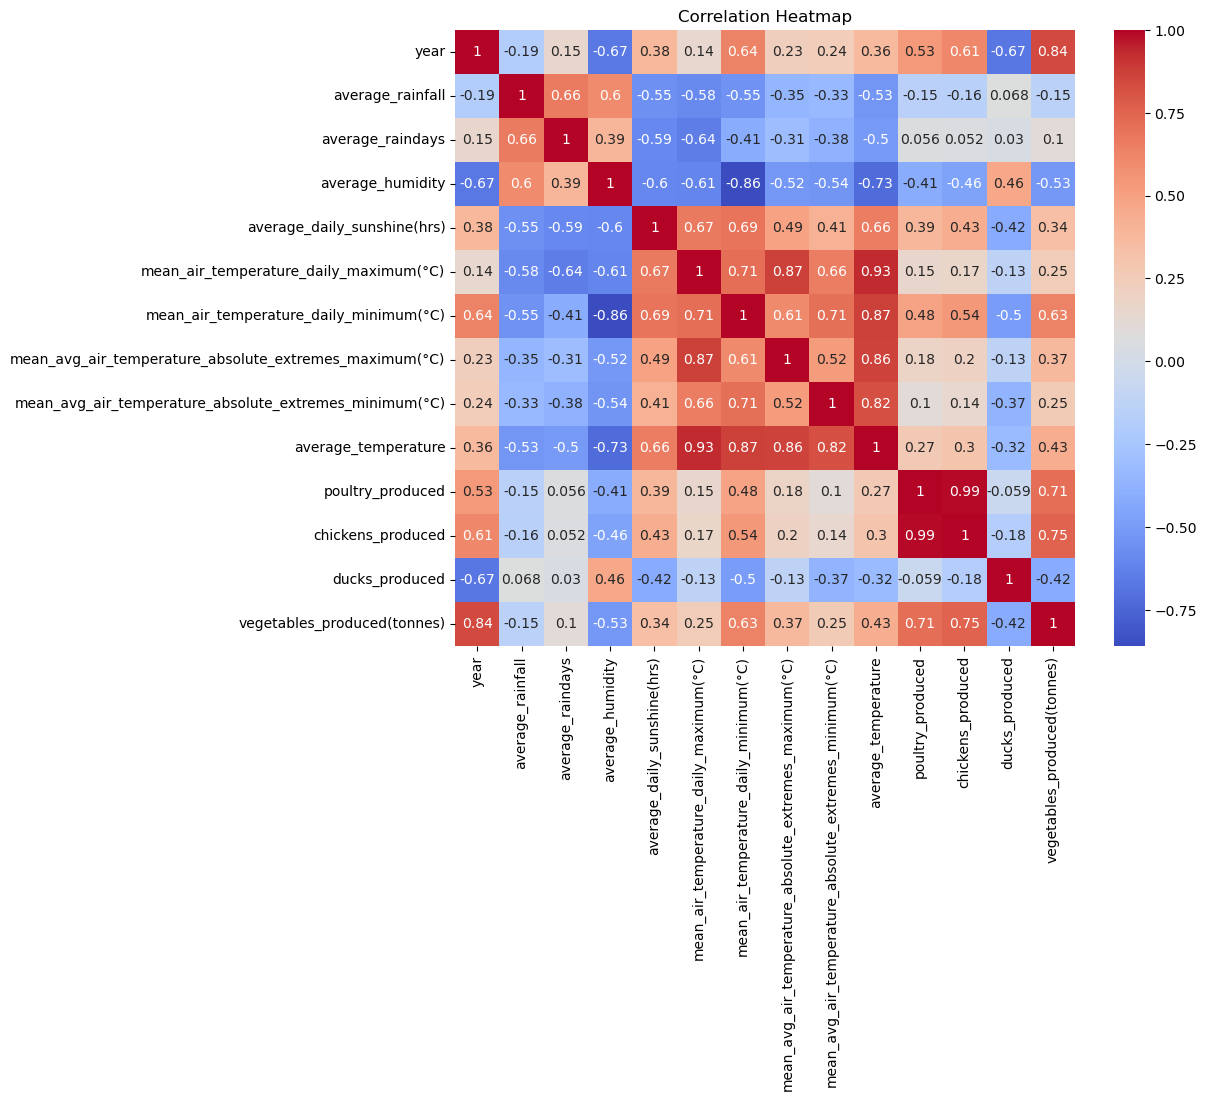

In [60]:
corr_matrix = final_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observations of heatmap and correlation:

When comparing correlation of humidity to poultry and vegetables produced -0.41 and -0.53 respectively. This shows that rain fall and humidity has the negative correlation to agriculture production. Therefore, meaning as humidity increases, agriculture production is likely to decrease. And, more importance is needed to be placed on predicting spells of high humidity

Also. When comparing correlation of minimum average temperature to poultry and vegetables produced it shows positive correlation with 0.48 and 0.63 respectively. This shows that minimum average temperature which can be interpreted as colder weather has the strongest positive correlation to agriculture production. However, extreme cold temerature does not show the same correlation strength to poultry and vegetables produced at 0.1 and 0.25 respectively as minimum average temperature.

Histograms of focused variables based on obervation of correlation heatmap

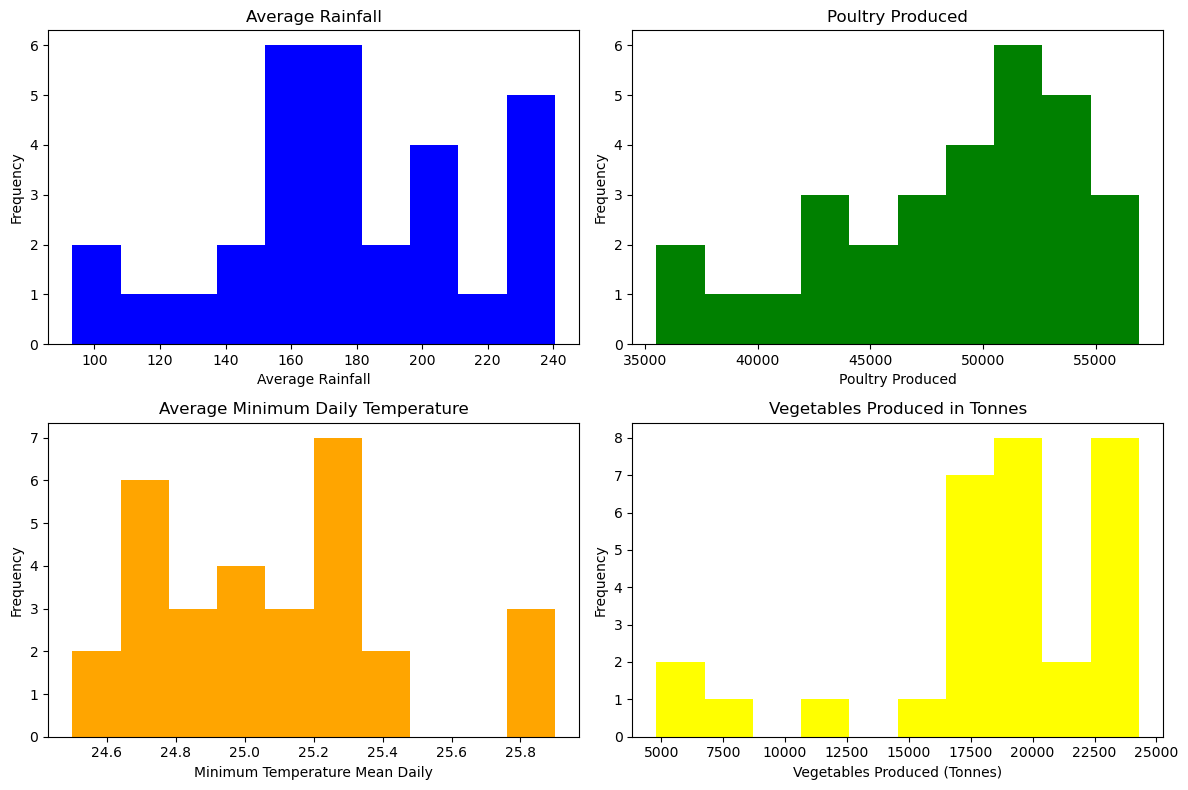

In [61]:
# Create subplots for histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histogram for average_rainfall
axs[0, 0].hist(final_df['average_rainfall'], bins=10, color='blue')
axs[0, 0].set_title('Average Rainfall')
axs[0, 0].set_xlabel('Average Rainfall')
axs[0, 0].set_ylabel('Frequency')

# Plot histogram for poultry_produced
axs[0, 1].hist(final_df['poultry_produced'], bins=10, color='green')
axs[0, 1].set_title('Poultry Produced')
axs[0, 1].set_xlabel('Poultry Produced')
axs[0, 1].set_ylabel('Frequency')

# Plot histogram for average-temperature
axs[1, 0].hist(final_df['mean_air_temperature_daily_minimum(°C)'], bins=10, color='orange')
axs[1, 0].set_title('Average Minimum Daily Temperature')
axs[1, 0].set_xlabel('Minimum Temperature Mean Daily')
axs[1, 0].set_ylabel('Frequency')

# Plot histogram for vegetables_produced(tonnes)
axs[1, 1].hist(final_df['vegetables_produced(tonnes)'], bins=10, color='yellow')
axs[1, 1].set_title('Vegetables Produced in Tonnes')
axs[1, 1].set_xlabel('Vegetables Produced (Tonnes)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Histograms shows that data is not normally distributed. Observations as followed:

"Average Rainfall" falls under bimodal or multimodal distribution. This may be due the fact that weather being unpredictable therefore causing a bimodal or multimodal distribution. Likewise fort temperature, which can be seen in the "Average Minimum Daily Temperature" chart, which would ultimately affect production. This further support the motivation for a analysis and creation of a robust model to accurately forecast weather to allow farmers to adjust to differing weather conditions.

Scatterplot to display correlation observed

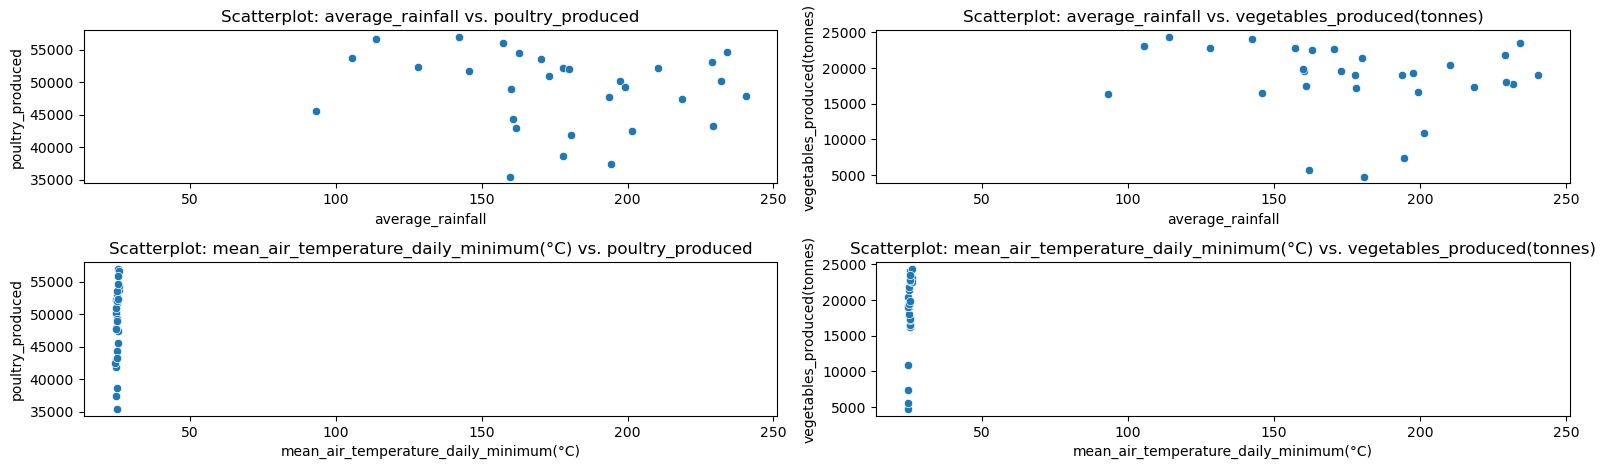

In [62]:
# Establish figure size.
plt.figure(figsize=(16, 9))

# Create subplot 1 (top-left)
ax1 = plt.subplot(4, 2, 1)
ax1.set_title('Scatterplot: average_rainfall vs. poultry_produced')
sns.scatterplot(data=final_df, x='average_rainfall', y='poultry_produced', ax=ax1)

# Create subplot 2 (top-right)
ax2 = plt.subplot(4, 2, 2, sharex=ax1)
ax2.set_title('Scatterplot: average_rainfall vs. vegetables_produced(tonnes)')
sns.scatterplot(data=final_df, x='average_rainfall', y='vegetables_produced(tonnes)', ax=ax2)

# Create subplot 3 (bottom-left)
ax3 = plt.subplot(4, 2, 3, sharex=ax2)
ax3.set_title('Scatterplot: mean_air_temperature_daily_minimum(°C) vs. poultry_produced')
sns.scatterplot(data=final_df, x='mean_air_temperature_daily_minimum(°C)', y='poultry_produced', ax=ax3)

# Create subplot 4 (bottom-right)
ax4 = plt.subplot(4, 2, 4, sharex=ax3)
ax4.set_title('Scatterplot: mean_air_temperature_daily_minimum(°C) vs. vegetables_produced(tonnes)')
sns.scatterplot(data=final_df, x='mean_air_temperature_daily_minimum(°C)', y='vegetables_produced(tonnes)', ax=ax4)

# Adjust the spacing between subplots for a better layout
plt.tight_layout()

plt.show()

Here we can visually see the correlation of the different variables in the dataset as mentioned above. To reiterate, positve correlation is seen comparing minimum temperature with production instead of rainfall.

Ploting of the box-and-whiskers plot to identify any outliers in the dataset.

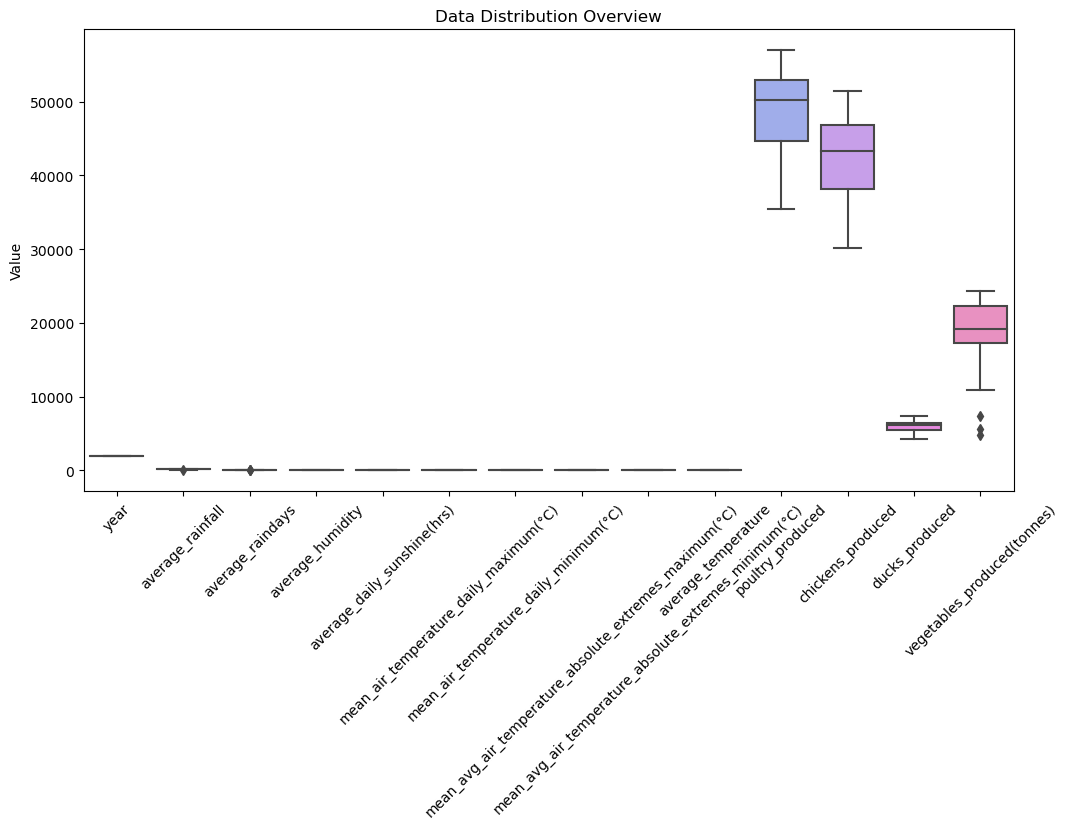

In [63]:
# Calculate the quantiles and interquartile range for each column
quantiles = final_df.quantile([0.25, 0.75])
Q1 = quantiles.loc[0.25]  # First quartile (25th percentile)
Q3 = quantiles.loc[0.75]  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Determine the upper and lower bounds for outliers for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers for each column
outliers = final_df[(final_df < lower_bound) | (final_df > upper_bound)]
outliers = outliers.dropna(how="all")  # Drop rows with null values in all columns

# Plot the boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df)
plt.title('Data Distribution Overview')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Comments on the different quartiles:

Datapoints relating to weather have short length of the box and whiskers showing a low spread of the data indicating consistency between years. It appears to be similar for ducks produced. However, for poultry, by that extent chicken, production shows to be more inconsistent. Likewise, is observed with vegetables produced. Outlier thats can be seen on vegetables production, possible explanationswill be dicussed further down


Plotting of line charts

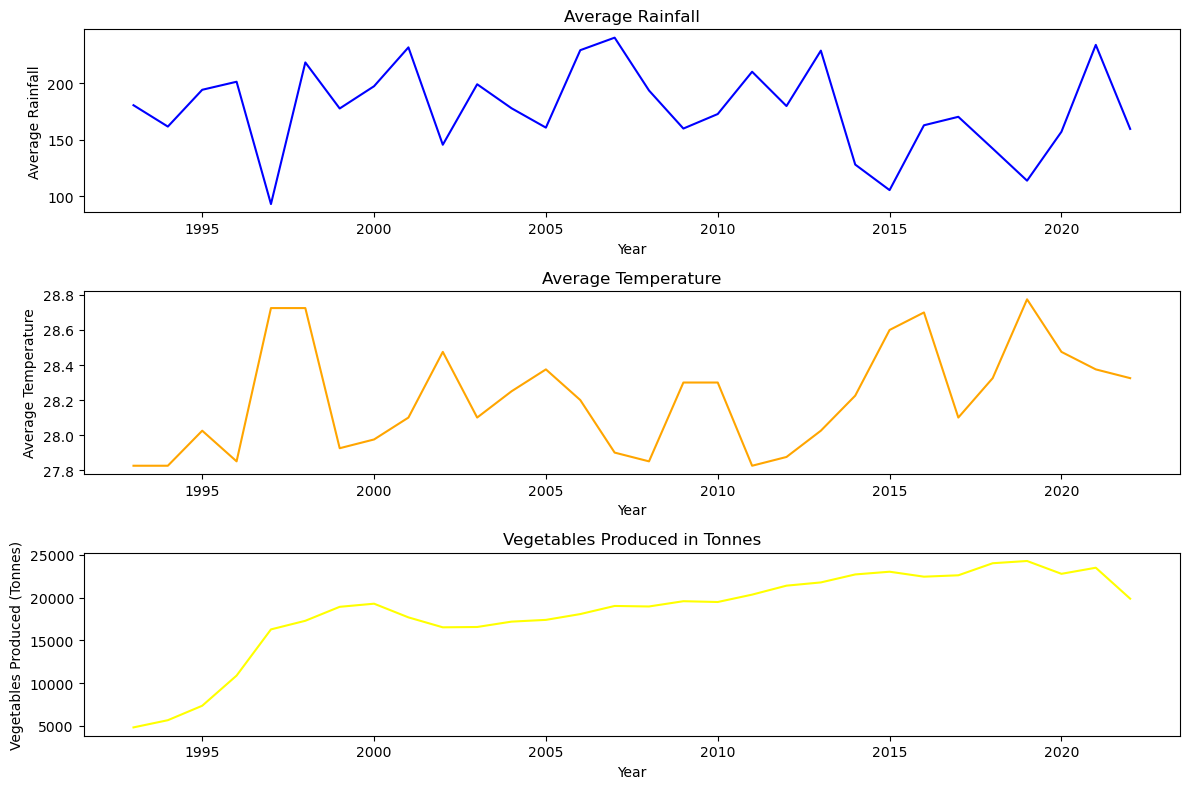

In [64]:
# Create subplots for line charts
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Plot line chart for average_daily_sunshine(hrs)
axs[0].plot(final_df['year'], final_df['average_rainfall'], color='blue')
axs[0].set_title('Average Rainfall')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Rainfall')

# Plot line chart for average_temperature
axs[1].plot(final_df['year'], final_df['average_temperature'], color='orange')
axs[1].set_title('Average Temperature')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average Temperature')

# Plot line chart for vegetables_produced(tonnes)
axs[2].plot(final_df['year'], final_df['vegetables_produced(tonnes)'], color='yellow')
axs[2].set_title('Vegetables Produced in Tonnes')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Vegetables Produced (Tonnes)')

plt.tight_layout()
plt.show()

Observation of outliers

Outliers from vegetables production can be seen on this line graph from in between 1995 and 2000 to before 1995. However, it seems to be caused by factors outside of weather as fluctuations does not match the weather, in this case rainfall and temperature factors observed to have correlation to production. Further research will be needed to look into what the possible factors that is unfortunately currently out of scope of this analysis

Plotting line chart to show temperature fluctuation

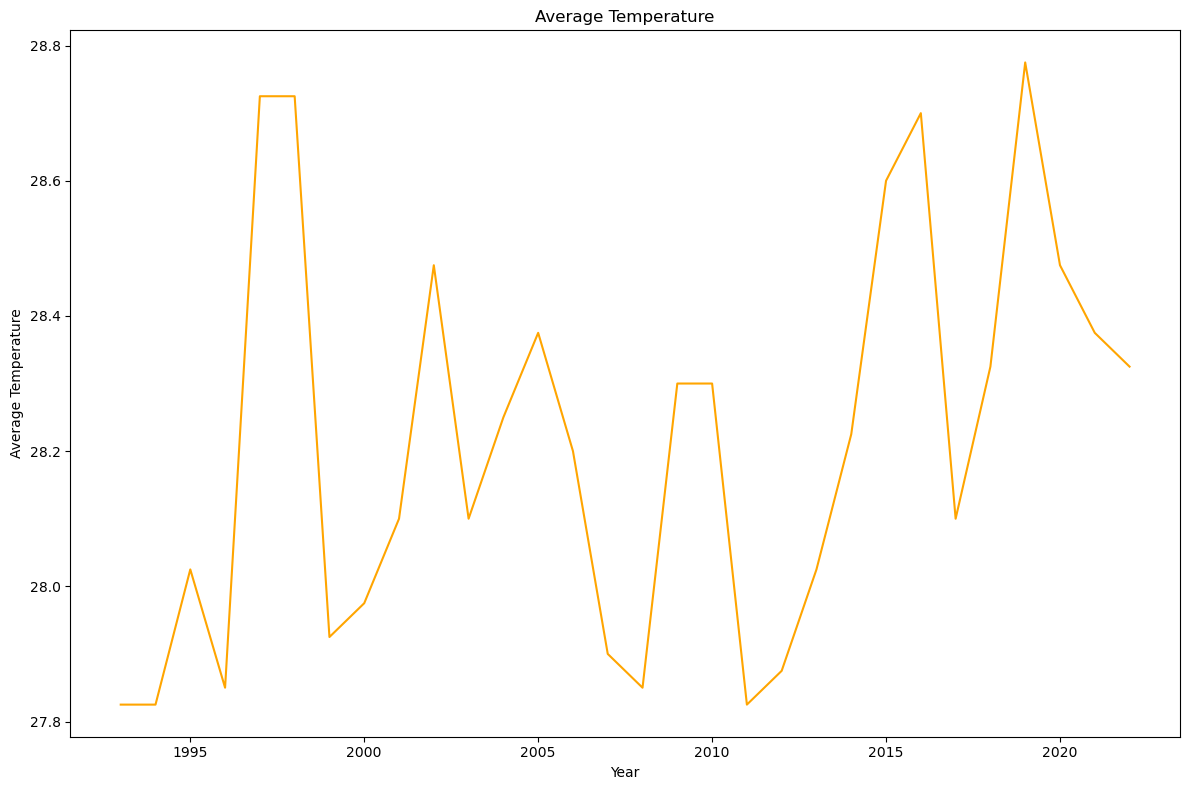

In [65]:
# Create subplots for line charts
fig, ax = plt.subplots(figsize=(12, 8))

# Plot line chart for average_temperature
ax.plot(final_df['year'], final_df['average_temperature'], color='orange')
ax.set_title('Average Temperature')
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature')

plt.tight_layout()
plt.show()

In this graph, average temperature shows minimal fluctuations, around a range of approximately 1 degree Celsius over three decades. This stability allows farmers to select crops that thrive best within the temperature range of roughly 27.8 to 28.8 degrees Celsius. Consequently, they can maintain farming specific crops without the need for frequent changes. Moreover, consistant temperature implies that supporting infrastructures for these crops can be utilized long term, fostering cost-effective investment in the necessary infrastructure to support crops that are well-suited to flourish within this stable temperature range.

## Conclusions

For the agriculture industry, weather plays an important part in the effectiveness of production. Through this analysis, we are able to observe that there is a correlation between weather and agriculture production. Seasons with increased humidity is likely to correlate with decreased agricultural production putting more emphasis on the importance of spotting trends of humidity. This analysis also provides observations of the correlation between weather and agricultural production in Singapore by providing a picture of historical trends on the effect. Through this analysis, a stronger correlation of colder temperature but not to the extreme end was found, with the consideration that rainfall and raindays have an effect in weather.

Average temperature shows minimal fluctuations, around a range of approximately 1 degree Celsius over three decades. This stability allows farmers to select crops that thrive best within the temperature range of roughly 27.8 to 28.8 degrees Celsius.

## Limitations and Recommendations

As average temperature remain relatively constant throughout 30 years, as analyzed above, we recommend that farmer select crops that thrive best within the temperature range of roughly 27.8 to 28.8 degrees Celsius as it allows them to reliably grow crops and save cost with minimal need to change supporting infrastructures for these crops

Further models will be necessary to accurately predict frequency and magnitude of rainfall to better offer an effective decision support system that can provide timely recommendations to farmers. This entails utilizing advanced data analysis techniques, like machine learning algorithms, to analyze historical rainfall patterns and identify influential factors. By leveraging these techniques, we can improve the precision of trend analysis, leading to more reliable predictions of future rainfall patterns. This enhanced system will provide farmers with precise information to adjust accordingly and have measures in place with the predictions, improving agricultural productivity and sustainability in Singapore.

With the insights gain from this analysis, perhaps future analysis may consider omitting the number of raindays variable as it has shown to have the weakest correlations to agricultural production.